```markdown
# GPGN268 - Geophysical Data Analysis
## Data Story 02 - Global Warming

**Student:** Wade Kahl 
**Collaborators:**

**Date:** April 14th, 2024
```

In [347]:
#Introduction:

#Argo floats are measurement devices across the world’s ocean that collect data on water temperature, salinity and velocity. 
#Each float collects all of this data. Their main purpose is to study the ocean as a whole through calculations like 
#density of the sea water, sea surface height and distribution of mass in the ocean.The data comes from temperature, salinity 
#and pressure sensors and is sent through an antenna on a given Argo float. These values help gauge the current climate system, 
#find long term correlations, look at glacier melt rates and heat storage in the ocean. Lots of this data can prove and show 
#the increase in global warming.

#The data is structured through both time series and spatial data formats. As longitude and latitude is included in certain data 
#sets to show locations of argo floats. And time series can be seen through the relative times the measurements are recorded.
#The overall format of the data is NetCDF and some advantages of this format are its multidimensionality allowing ease of 
#integrating data that have the same time or type. It’s well labeled and organized data helps us interpret the data better.
#Although the file size and complexity of the data can be hard for new data interpreters. Some common tools for analyzing this 
#data are python and its extensions like matplotlib, xarrays and pandas. As in this assignment we will be using these to visual 
#multiple sets of data.


In [348]:
#2.1

import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import cartopy.crs as ccrs


# Load the data
ds_raw = xr.load_dataset('5901429_prof.nc')
# List of variables that we will use
variables = ['TEMP_ADJUSTED','PSAL_ADJUSTED',
             'LATITUDE', 'LONGITUDE', 'JULD']
# Select only these variables from the whole dataset
ds = ds_raw[variables]
# Rename the variable 'JULD' to 'time' and make time a dimension
# (inplace of 'N_PROF') 
ds = ds.rename({'JULD':'time'}).swap_dims({'N_PROF':'time'})
# Change variable names to names that are cleaner and easier to type
ds = ds.rename({'TEMP_ADJUSTED':'temperature',
                'PSAL_ADJUSTED':'salinity',
                'LATITUDE':'latitude',
                'LONGITUDE':'longitude'})
# Defining a common pressure coordinate based on the average
# pressure at each level accross all profiles
mean_pressure = ds_raw.PRES_ADJUSTED.mean(dim='N_PROF')
# Create a new variable "pressure" in the dataset and specify the units
ds['pressure'] = mean_pressure
ds['pressure'].attrs['units'] = 'dbar'
# Make "pressure" on of the dimensions (inplace of 'N_LEVELS')
ds = ds.swap_dims({'N_LEVELS':'pressure'})


#ds29 = read_float_data('1901487_prof.nc')
#ds87 = read_float_data('5901429_prof.nc')

In [349]:
# Load the second data set
ds_raw2 = xr.load_dataset('1901487_prof.nc')
# List of variables that we will use
variables2 = ['TEMP_ADJUSTED','PSAL_ADJUSTED',
             'LATITUDE', 'LONGITUDE', 'JULD']
# Select only these variables from the whole dataset
ds2 = ds_raw2[variables2]
# Rename the variable 'JULD' to 'time' and make time a dimension
# (inplace of 'N_PROF') 
ds2 = ds2.rename({'JULD':'time'}).swap_dims({'N_PROF':'time'})
# Change variable names to names that are cleaner and easier to type
ds2 = ds2.rename({'TEMP_ADJUSTED':'temperature',
                'PSAL_ADJUSTED':'salinity',
                'LATITUDE':'latitude',
                'LONGITUDE':'longitude'})
# Defining a common pressure coordinate based on the average
# pressure at each level accross all profiles
mean_pressure2 = ds_raw2.PRES_ADJUSTED.mean(dim='N_PROF')
# Create a new variable "pressure" in the dataset and specify the units
ds2['pressure'] = mean_pressure2
ds2['pressure'].attrs['units'] = 'dbar'
# Make "pressure" on of the dimensions (inplace of 'N_LEVELS')
ds2 = ds2.swap_dims({'N_LEVELS':'pressure'})

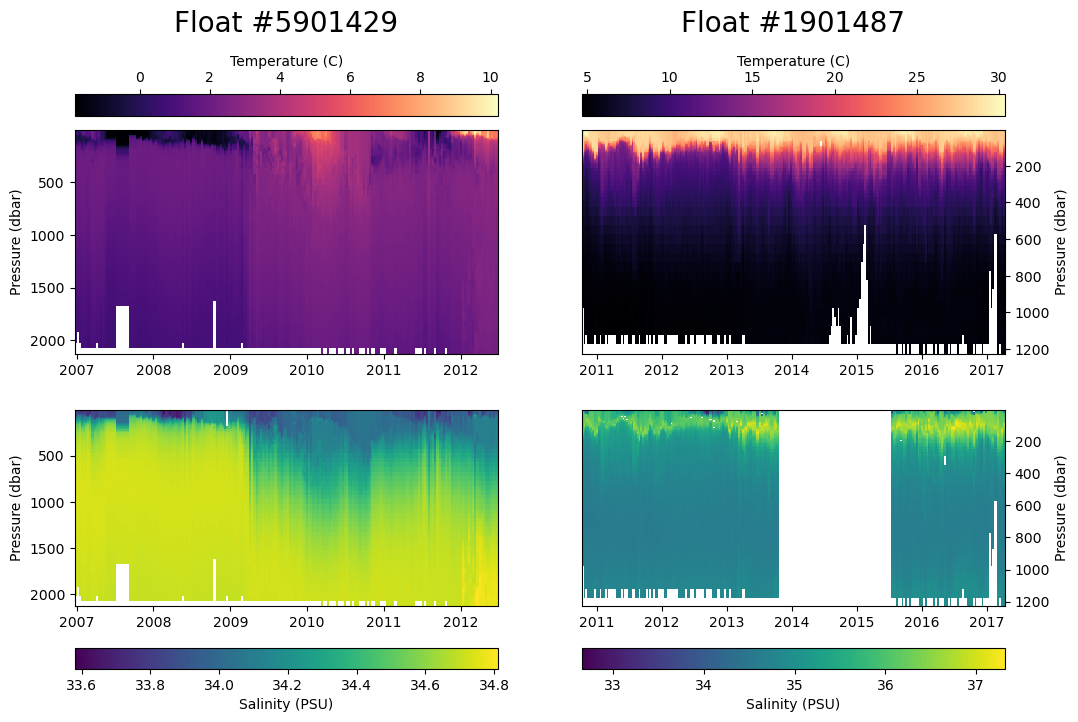

In [350]:
#2.2

fig, axes = plt.subplots(2, 2, figsize=(12,8))
[ax1, ax2, ax3, ax4] = axes.flatten()
# Note you will need to transpose the temperature (using .T) to plot
cs1 = ax1.pcolormesh(ds.time, ds.pressure, ds.temperature.T, cmap='magma') #float 59 temp vs pressure
ax1.invert_yaxis()
ax1.set_ylabel('Pressure (dbar)')
ax1.set_title("Float #5901429", y=1.4, fontsize=20)
cbar1 = plt.colorbar(cs1, ax=ax1,
                     label='Temperature (C)',
                     orientation='horizontal',
                     location = 'top')

cs2 = ax2.pcolormesh(ds2.time, ds2.pressure, ds2.temperature.T, cmap='magma') #float 19 temp vs pressure
ax2.invert_yaxis()
ax2.set_ylabel('Pressure (dbar)',labelpad=-350)
ax2.set_title("Float #1901487", y=1.4, fontsize=20)
ax2.yaxis.tick_right()

cbar2 = plt.colorbar(cs2, ax=ax2,
                     label='Temperature (C)',
                     orientation='horizontal',
                     location = 'top')

cs3 = ax3.pcolormesh(ds.time, ds.pressure, ds.salinity.T, cmap='viridis') #float 59 saln vs pressure
ax3.invert_yaxis()
ax3.set_ylabel('Pressure (dbar)')
cbar3 = plt.colorbar(cs3, ax=ax3,
                     label='Salinity (PSU)',
                     orientation='horizontal',
                     location = 'bottom')

cs4 = ax4.pcolormesh(ds2.time, ds2.pressure, ds2.salinity.T, cmap='viridis') #float 19 saln vs pressure
ax4.invert_yaxis()
ax4.set_ylabel('Pressure (dbar)',labelpad=-350)
ax4.yaxis.tick_right()
cbar4 = plt.colorbar(cs4, ax=ax4,
                     label='Salinity (PSU)',
                     orientation='horizontal',
                     location = 'bottom')

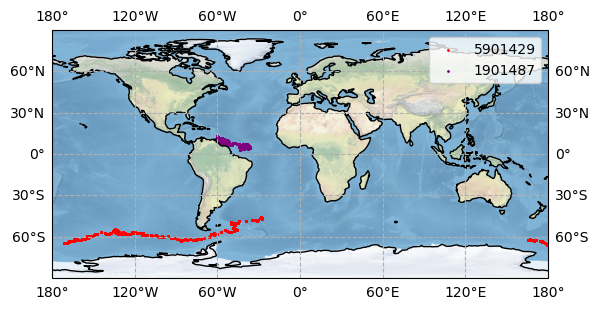

In [351]:
#2.3

import cartopy.crs as ccrs
import cartopy

ax = plt.axes(projection=ccrs.PlateCarree(), extent=[-180, 180, -90, 90])
ax.coastlines()
ax.stock_img()
ax.gridlines(draw_labels=True, linestyle='--')

# Plot each float's trajectory
for data in ds.items():
    ax.scatter(ds['longitude'], ds['latitude'],s=1, transform=ccrs.PlateCarree(),color='red')

for data in ds2.items():
    ax.scatter(ds2['longitude'], ds2['latitude'],s=1, transform=ccrs.PlateCarree(),color='purple')


ax.scatter(ds['longitude'], ds['latitude'],label='5901429',color='red',s=1)
ax.scatter(ds2['longitude'], ds2['latitude'],label='1901487',color='purple',s=1)
ax.legend()


# Add titles, labels, and gridlines


plt.show()

What story can you tell from your sections?
How does temperature and salinity vary with time, depth, and geographical locations?
What are some main differences between the observations from float 5901429 and float 1901487?
Is that consistent with what you would expect? In what way?

In [352]:
#2.4

#From visualizing float temperature and salinity, I can see that the general trend of as depth decreases, temperature 
#increases. This is because pressure is lowest near the ocean surface where temperature is high due to sunlight.
#Task 2.2 also shows that at float #59, as pressure decreases, salinity decreases. But at float #19, as pressure decreases, 
#salinity increases. This is what I would expect if float #59 is near melting glaciers. Because melting glaciers causes 
#freshwater to enter the sea from the ocean’s surface which decreases salinity. The correlations with decreasing pressure 
#make sense, as pressure increases as you move away from the ocean surface. Looking at the changes across time, I can see 
#that one float sees an increase in salinity while the other sees a decrease. I would expect this, as one of these floats 
#seems to be near melting glaciers. Float #59 sees a small but noticeable increase in temperature from 2007 to 2012. While 
#float #19 sees no change in overall temperature from 2011 to 2017.

#Now looking at the float trajectories on a global map, I can see my assumption that float #59 is near glaciers is correct.
#Although its relative position to glacier melt does change throughout the years. While float #19 stays near South America’s 
#shores for the most part, so pollution and waste may be affecting some or all of its measurements. Which may be why the two
#floats see opposite changes in salinity and temperature across time. Their general geographical location could be a reason 
#they see different temperatures. 

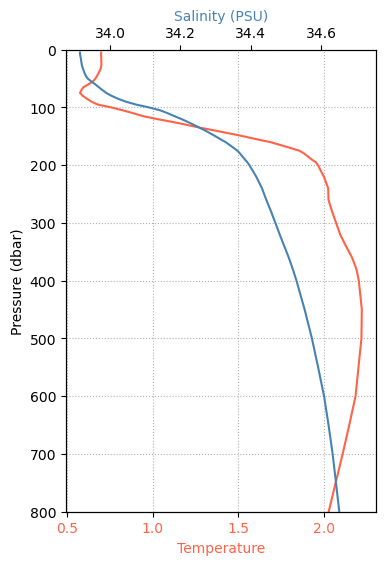

In [353]:
import matplotlib.pyplot as plt

#Calculate mean salinity for float 5901429 south of 60 S
south_temp = ds.temperature[ds.latitude < -60]
south_sal = ds.salinity[ds.latitude < -60]

fig, ax1 = plt.subplots(figsize=(4, 6))

color = 'tomato'
ax1.plot(south_temp.mean(dim='time'), south_temp.pressure, color=color)
ax1.set_xlabel('Temperature', color=color)
ax1.set_ylabel('Pressure (dbar)')
ax1.set_ylim([0, 800])  # Reverse y-axis to represent depth
ax1.invert_yaxis()
ax1.tick_params(axis='x', labelcolor=color)
ax1.grid(ls='dotted', which='both')

ax2 = ax1.twiny()
color = 'steelblue'
ax2.plot(south_sal.mean(dim='time'), south_sal.pressure, color=color)
ax2.set_xlabel('Salinity (PSU)', color=color)



plt.show()

In [354]:
import xarray as xr

# Open the dataset without decoding times
ds = xr.open_dataset('/Users/wadekahl/work/classes/GPGN268/coursework-kahl/ds02-global-warming/RG_ArgoClim_Temperature_2019.nc', decode_times=False)

#Question:
#The error I saw was the following:

#Failed to decode variable 'TIME': unable to decode time units 'months since 2004-01-01 00:00:00' with 'the default calendar'
#. Try opening your dataset with decode_times=False or installing cftime if it is not installed.

#I added decode_times = False and it was fixed.

# Create a variable with the date of our first data point (origin)
t0 = np.datetime64("2004-01")
# Create a sequence representing the number 
# of months since 2004-01 ranging from 0 to 179
months = range(len(ds.TIME))
# Create and array of dates where you add 1...179 months 
# to the origin date t0
time = np.array([t0 + np.timedelta64(m, "M") for m in months])

ds = ds.rename({'TIME':'time'})
ds = ds.rename({'ARGO_TEMPERATURE_MEAN':'temp_mean',
                'ARGO_TEMPERATURE_ANOMALY':'temp_anom',
                'PRESSURE':'pressure',
                'LATITUDE':'latitude',
                'LONGITUDE':'longitude'})
# Replace the old values with the time array that we created
ds['time'] = time

/var/folders/xc/btyf02yj4kv04z80phtrbnp40000gn/T/ipykernel_10029/3991013737.py:30: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  ds['time'] = time
/var/folders/xc/btyf02yj4kv04z80phtrbnp40000gn/T/ipykernel_10029/3991013737.py:30: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable co

In [355]:
#Bonus

import hvplot.xarray

depth_ave_temp = ds.temp_anom.mean(dim='pressure')
depth_ave_temp.hvplot('longitude', 'latitude', cmap='RdBu_r', clim=(-3, 3))

:DynamicMap   [time]
   :Image   [longitude,latitude]   (temp_anom)

In [356]:
seasonal_temp = depth_ave_temp.groupby("time.season").mean()

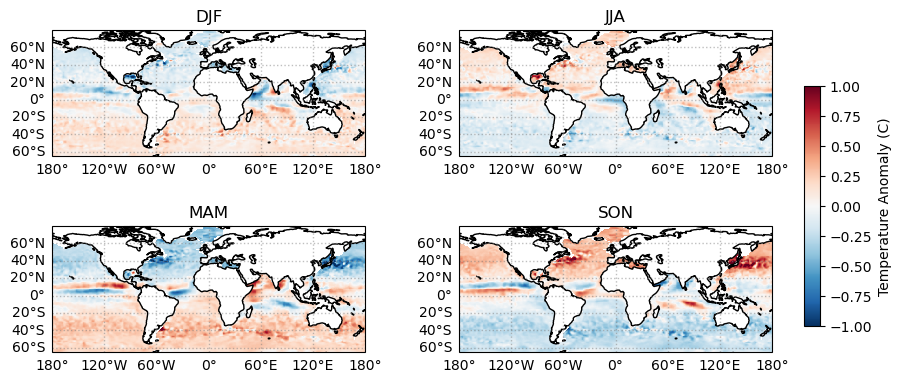

In [357]:
#3.2:

seasonal_temp = depth_ave_temp.groupby("time.season").mean()

# Define limits for the colorbar
vmin = -1
vmax = 1
# Creates four subplots (2 rows and 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(8, 6), subplot_kw={'projection': ccrs.PlateCarree()})
axes = axes.flatten()

for i, s in enumerate(seasonal_temp.season):
    ax = axes[i]
    cs = ax.pcolormesh(ds.longitude, ds.latitude, seasonal_temp.sel(season=s),
                       transform = ccrs.PlateCarree(),
                       vmin=vmin,vmax=vmax,cmap='RdBu_r')
    ax.set_title("{}".format(s.values))
    ax.coastlines()
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray',
                  alpha=0.5, linestyle='dotted')
    gl.top_labels = False
    gl.right_labels = False

    

cax = fig.add_axes([0.99, 0.35, 0.02, 0.4])
cbar = plt.colorbar(cs, cax=cax,label='Temperature Anomaly (C)')
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.3, hspace=0.01)




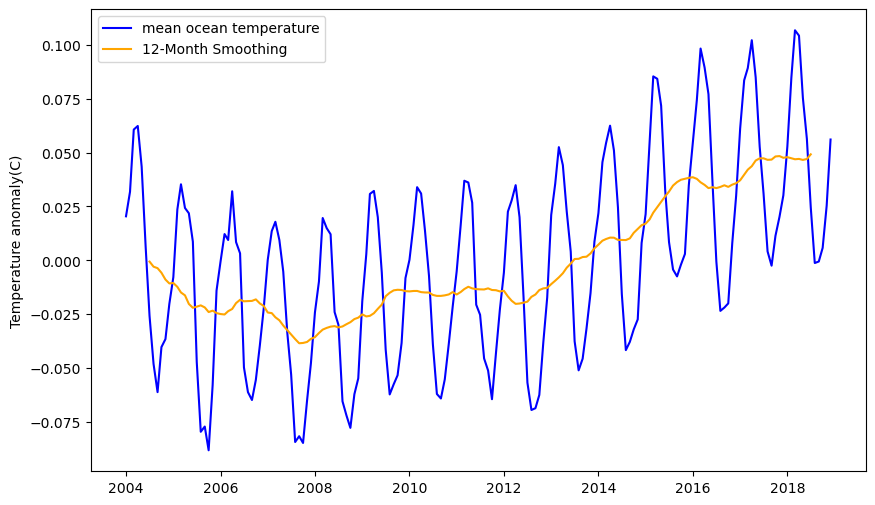

In [358]:
#3.3


global_mean = depth_ave_temp.mean(dim=['latitude','longitude'])
running_mean = global_mean.rolling(time=12, center=True).mean()



# Plot the global mean ocean temperature and its 12-month smoothing versus time in years
plt.figure(figsize=(10, 6))
plt.plot(global_mean.time, global_mean, label='mean ocean temperature', color='blue')
plt.plot(running_mean.time, running_mean, label='12-Month Smoothing', color='orange')
plt.ylabel('Temperature anomaly(C)')
plt.legend()